# EPL matches winner prediction

## Visualize data

The data is scraped from 2019-2024 (6 seasons)

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [132]:
matches = pd.read_csv("matches.csv", index_col=0)

In [133]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,Burnley,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,Manchester City
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,Newcastle Utd,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,Manchester City
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,Manchester City
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5.0,1.0,Fulham,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,Manchester City
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,West Ham,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,Manchester City


Overview of the dataset

In [134]:
matches.shape

(4532, 27)

In [135]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [136]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4532 entries, 1 to 39
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4532 non-null   object 
 1   time          4532 non-null   object 
 2   comp          4532 non-null   object 
 3   round         4532 non-null   object 
 4   day           4532 non-null   object 
 5   venue         4532 non-null   object 
 6   result        4532 non-null   object 
 7   gf            4532 non-null   float64
 8   ga            4532 non-null   float64
 9   opponent      4532 non-null   object 
 10  xg            4532 non-null   float64
 11  xga           4532 non-null   float64
 12  poss          4532 non-null   float64
 13  attendance    3648 non-null   float64
 14  captain       4532 non-null   object 
 15  formation     4532 non-null   object 
 16  referee       4532 non-null   object 
 17  match report  4532 non-null   object 
 18  notes         0 non-null      float

In [137]:
matches.describe()

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,3648.000000,0.0,4532.000000,4532.000000,4530.000000,4532.000000,4532.000000,4532.000000,4532.000000
mean,1.429391,1.429391,1.384245,1.384245,50.000883,38557.554276,NaN,12.583407,4.208738,17.360486,0.440865,0.112533,0.138350,2021.484554
std,1.291229,1.291229,0.818994,0.818994,12.875000,16992.709182,NaN,5.532502,2.459225,3.009429,0.659239,0.334379,0.369391,1.701903
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,2019.000000
25%,0.000000,0.000000,0.800000,0.800000,40.000000,25647.250000,NaN,9.000000,2.000000,15.400000,0.000000,0.000000,0.000000,2020.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,32571.000000,NaN,12.000000,4.000000,17.200000,0.000000,0.000000,0.000000,2021.000000
75%,2.000000,2.000000,1.900000,1.900000,60.000000,53177.250000,NaN,16.000000,6.000000,19.100000,1.000000,0.000000,0.000000,2023.000000
max,9.000000,9.000000,7.000000,7.000000,82.000000,81332.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.000000,2024.000000


Here we have some important features, gf(goals for), ga(goals against), xg(expected goals), xga(expected goals against), poss(possession), sh(shots), sot(shots on target), fk(free kicks), pk(passes key), pkatt(passes key attempts)

In [138]:
matches["team"].value_counts()

team
Everton                     227
Arsenal                     227
Wolverhampton Wanderers     227
Crystal Palace              227
West Ham United             227
Manchester United           226
Brighton and Hove Albion    226
Manchester City             226
Chelsea                     226
Liverpool                   226
Tottenham Hotspur           226
Newcastle United            226
Southampton                 190
Leicester City              190
Burnley                     189
Aston Villa                 188
Fulham                      151
Bournemouth                 151
Leeds United                114
Watford                     114
Brentford                   113
Sheffield United            113
Norwich City                 76
Nottingham Forest            75
West Bromwich Albion         38
Cardiff City                 38
Huddersfield Town            38
Luton Town                   37
Name: count, dtype: int64

In [139]:
matches[matches["team"] == "Sheffield United"]

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2023-08-12,15:00,Premier League,Matchweek 1,Sat,Home,L,0.0,1.0,Crystal Palace,...,Match Report,NaN,8.0,1.0,19.4,0.0,0,0,2024,Sheffield United
1,2023-08-18,19:45,Premier League,Matchweek 2,Fri,Away,L,1.0,2.0,Nott'ham Forest,...,Match Report,NaN,7.0,3.0,18.8,0.0,0,0,2024,Sheffield United
2,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Home,L,1.0,2.0,Manchester City,...,Match Report,NaN,6.0,1.0,16.1,0.0,0,0,2024,Sheffield United
4,2023-09-02,12:30,Premier League,Matchweek 4,Sat,Home,D,2.0,2.0,Everton,...,Match Report,NaN,13.0,7.0,14.1,0.0,0,0,2024,Sheffield United
5,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,L,1.0,2.0,Tottenham,...,Match Report,NaN,7.0,5.0,17.6,0.0,0,0,2024,Sheffield United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,2020-07-08,18:00,Premier League,Matchweek 34,Wed,Home,W,1.0,0.0,Wolves,...,Match Report,NaN,7.0,3.0,12.9,0.0,0,0,2020,Sheffield United
40,2020-07-11,17:30,Premier League,Matchweek 35,Sat,Home,W,3.0,0.0,Chelsea,...,Match Report,NaN,9.0,4.0,10.6,0.0,0,0,2020,Sheffield United
41,2020-07-16,18:00,Premier League,Matchweek 36,Thu,Away,L,0.0,2.0,Leicester City,...,Match Report,NaN,5.0,1.0,13.3,0.0,0,0,2020,Sheffield United
42,2020-07-20,18:00,Premier League,Matchweek 37,Mon,Home,L,0.0,1.0,Everton,...,Match Report,NaN,8.0,0.0,13.4,0.0,0,0,2020,Sheffield United


There are teams that have less matches as they were relegated some seasons

In [140]:
matches["round"].value_counts()

round
Matchweek 1     120
Matchweek 20    120
Matchweek 22    120
Matchweek 23    120
Matchweek 24    120
Matchweek 25    120
Matchweek 18    120
Matchweek 26    120
Matchweek 27    120
Matchweek 28    120
Matchweek 30    120
Matchweek 31    120
Matchweek 32    120
Matchweek 33    120
Matchweek 29    120
Matchweek 35    120
Matchweek 36    120
Matchweek 2     120
Matchweek 21    120
Matchweek 19    120
Matchweek 17    120
Matchweek 3     120
Matchweek 4     120
Matchweek 5     120
Matchweek 6     120
Matchweek 7     120
Matchweek 8     120
Matchweek 9     120
Matchweek 10    120
Matchweek 11    120
Matchweek 12    120
Matchweek 13    120
Matchweek 14    120
Matchweek 15    120
Matchweek 16    120
Matchweek 37    118
Matchweek 34    114
Matchweek 38    100
Name: count, dtype: int64

## Clean data

In [141]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

Machine learning can't work with object so we will convert some useful columns to other data types

In [142]:
matches["date"] = pd.to_datetime(matches["date"]) # convert to datetime

In [143]:
# encode data
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek
matches["target"] = (matches["result"] == 'W').astype("int") # win as 1, otherwise 0
matches["captain_code"] = matches["captain"].astype("category").cat.codes
matches["referee_code"] = matches["referee"].astype("category").cat.codes
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
venue_code                int8
opp_code                  int8
hour                     int64
day_code                 int32
target                   int64
captain_

So we converted date object to datetime to split the data set later on and created some new columns that we think might be useful for making predictions.
Let's take a look at the dataset right now

In [144]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,venue_code,opp_code,hour,day_code,target,captain_code,referee_code
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,Burnley,...,0,2024,Manchester City,0,5,20,4,1,105,4
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,Newcastle Utd,...,0,2024,Manchester City,1,18,20,5,1,110,26
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Sheffield Utd,...,1,2024,Manchester City,0,21,14,6,1,110,9
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5.0,1.0,Fulham,...,1,2024,Manchester City,1,10,15,5,1,110,19
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,West Ham,...,0,2024,Manchester City,0,26,15,5,1,110,1


## Features selection and model evaluations

First, let's try predicting using a random forest models with some of our predictors

In [145]:
rf = RandomForestClassifier(random_state=1)

Split the data into train and test set, we'll use data from 2019-2023 for training and 2023 to the end for testing

In [146]:
train = matches[matches["date"] < "2023-01-01"] # use data from 2019-2023 for training

In [147]:
test = matches[matches["date"] > "2023-01-01"] # use data after 2023 for testing

In [148]:
train.shape, test.shape

((3368, 34), (1160, 34))

In [149]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "captain_code", "referee_code"] # used features

In [150]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(random_state=1)

In [151]:
preds = rf.predict(test[predictors])

In [152]:
acc = accuracy_score(test["target"], preds)
acc

0.5982758620689655

Here we've only used venue_code which is whether the team is away or home, opp_code which is the opponent, hour and day of the match  
Let's try other parameters

In [153]:
rf = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_split=10, random_state=1)
rf.fit(train[predictors], train["target"])
predictions = rf.predict(test[predictors])

In [154]:
accuracy_score(test["target"], rf.predict(test[predictors]))

0.6293103448275862

In [155]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=rf.predict(test[predictors])))

In [156]:
pd.crosstab(index=combined["actual"],  columns=combined["prediction"])

prediction,0,1
actual,,
0,696,14
1,416,34


In [157]:
precision_score(test["target"], rf.predict(test[predictors]))

0.7083333333333334

The precision is pretty low, for this problem we'll prioritize maximizing precision instead of general accuracy  
So far we've only used predictors like venue opponent, hour and day which are not that useful.  
And the thing with this problem is that most of the data we have are only accessible when the match is actually over.  
Next we'll try improving performance by using rolling averages to manipulate more data features in the past

In [158]:
# group the dataframe by teams
grouped_matches = matches.groupby("team")

In [159]:
grouped_matches.get_group("Manchester City")

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,venue_code,opp_code,hour,day_code,target,captain_code,referee_code
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,Burnley,...,0,2024,Manchester City,0,5,20,4,1,105,4
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,Newcastle Utd,...,0,2024,Manchester City,1,18,20,5,1,110,26
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Sheffield Utd,...,1,2024,Manchester City,0,21,14,6,1,110,9
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5.0,1.0,Fulham,...,1,2024,Manchester City,1,10,15,5,1,110,19
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,West Ham,...,0,2024,Manchester City,0,26,15,5,1,110,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,2019-04-20,12:30,Premier League,Matchweek 35,Sat,Home,W,1.0,0.0,Tottenham,...,0,2019,Manchester City,1,23,12,5,1,172,19
56,2019-04-24,20:00,Premier League,Matchweek 31,Wed,Away,W,2.0,0.0,Manchester Utd,...,0,2019,Manchester City,0,17,20,2,1,194,0
57,2019-04-28,14:05,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Burnley,...,0,2019,Manchester City,0,5,14,6,1,194,23
58,2019-05-06,20:00,Premier League,Matchweek 37,Mon,Home,W,1.0,0.0,Leicester City,...,0,2019,Manchester City,1,13,20,0,1,194,21


In [160]:
def rolling_averages(group, cols, new_cols):
  group = group.sort_values("date") # sort matches by dates
  rolling_stats = group[cols].rolling(3, closed="left").mean() # evaluate mean value of 3 previous matches
  group[new_cols] = rolling_stats
  group = group.dropna(subset=new_cols) # drop row with missing values
  return group

In [161]:
cols = ["gf", "ga", "sh", "poss", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'poss_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [162]:
group = grouped_matches.get_group("Liverpool")
rolling_averages(group, cols, new_cols) # new dataframe for team with added columns about performance in the past which we can actually use for future prediction

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee_code,gf_rolling,ga_rolling,sh_rolling,poss_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
3,2018-09-01,12:30,Premier League,Matchweek 4,Sat,Away,W,2.0,1.0,Leicester City,...,23,2.333333,0.000000,18.333333,65.333333,6.666667,16.800000,1.333333,0.333333,0.333333
4,2018-09-15,12:30,Premier League,Matchweek 5,Sat,Away,W,2.0,1.0,Tottenham,...,19,1.666667,0.333333,15.666667,60.333333,5.333333,17.633333,0.666667,0.333333,0.333333
6,2018-09-22,15:00,Premier League,Matchweek 6,Sat,Home,W,3.0,0.0,Southampton,...,23,1.666667,0.666667,16.333333,52.666667,7.000000,15.666667,0.666667,0.000000,0.000000
8,2018-09-29,17:30,Premier League,Matchweek 7,Sat,Away,D,1.0,1.0,Chelsea,...,0,2.333333,0.666667,13.000000,50.000000,5.666667,15.133333,0.666667,0.000000,0.000000
10,2018-10-07,16:30,Premier League,Matchweek 8,Sun,Home,D,0.0,0.0,Manchester City,...,17,2.000000,0.666667,14.000000,51.333333,5.666667,15.666667,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2024-04-14,14:00,Premier League,Matchweek 33,Sun,Home,L,0.0,1.0,Crystal Palace,...,3,2.333333,1.333333,28.666667,66.333333,7.666667,17.400000,0.333333,0.333333,0.333333
52,2024-04-21,16:30,Premier League,Matchweek 34,Sun,Away,W,3.0,1.0,Fulham,...,4,1.666667,1.333333,25.666667,71.000000,6.666667,16.033333,0.666667,0.333333,0.333333
53,2024-04-24,20:00,Premier League,Matchweek 29,Wed,Away,L,0.0,2.0,Everton,...,1,1.666667,1.333333,20.666667,63.666667,6.000000,16.266667,1.000000,0.333333,0.333333
54,2024-04-27,12:30,Premier League,Matchweek 35,Sat,Away,D,2.0,2.0,West Ham,...,2,1.000000,1.333333,19.333333,68.000000,6.333333,16.033333,1.000000,0.000000,0.000000


In [163]:
# apply rolling averages to every matches
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 3  2018-09-02  13:30  Premier League   Matchweek 4   
                        4  2018-09-15  15:00  Premier League   Matchweek 5   
                        6  2018-09-23  16:00  Premier League   Matchweek 6   
                        8  2018-09-29  15:00  Premier League   Matchweek 7   
                        10 2018-10-07  12:00  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 39 2024-04-20  19:30  Premier League  Matchweek 34   
                        40 2024-04-24  19:45  Premier League  Matchweek 29   
                        41 2024-04-27  15:00  Premier League  Matchweek 35   
                        42 2024-05-04  17:30  Premier League  Matchweek 36   
                        43 2024-05-11  15:00  Premier League  Matchweek 37   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 3   Sun  Away      W  3.0  2.0     Cardiff City  ...   
                        4   Sat  Away      W  2.0  1.0    Newcastle Utd  ...   
                        6   Sun  Home      W  2.0  0.0          Everton  ...   
                        8   Sat  Home      W  2.0  0.0          Watford  ...   
                        10  Sun  Away      W  5.0  1.0           Fulham  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 39  Sat  Home      L  0.0  2.0          Arsenal  ...   
                        40  Wed  Home      L  0.0  1.0      Bournemouth  ...   
                        41  Sat  Home      W  2.0  1.0       Luton Town  ...   
                        42  Sat  Away      L  1.0  5.0  Manchester City  ...   
                        43  Sat  Home      L  1.0  3.0   Crystal Palace  ...   

                            referee_code  gf_rolling  ga_rolling  sh_rolling  \
team                                                                           
Arsenal                 3              2    1.666667    2.000000   13.666667   
                        4             15    2.666667    2.000000   16.333333   
                        6             11    2.666667    1.333333   15.333333   
                        8              2    2.333333    1.000000   12.666667   
                        10            23    2.000000    0.333333   10.000000   
...                                  ...         ...         ...         ...   
Wolverhampton Wanderers 39            23    1.333333    1.666667   10.666667   
                        40            32    1.000000    2.000000    9.666667   
                        41             7    0.666667    1.666667   10.333333   
                        42             4    0.666667    1.333333   11.000000   
                        43            34    1.000000    2.333333   10.000000   

                           poss_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                          
Arsenal                 3     47.000000    6.333333    18.166667   0.333333   
                        4     57.000000    9.000000    17.300000   0.333333   
                        6     65.333333    7.666667    17.333333   0.666667   
                        8     65.666667    6.000000    17.133333   0.333333   
                        10    62.666667    3.000000    16.666667   0.333333   
...                                 ...         ...          ...        ...   
Wolverhampton Wanderers 39    53.666667    3.666667    17.966667   0.333333   
                        40    52.666667    4.000000    20.533333   0.333333   
                        41    54.333333    3.333333    18.766667   0.000000   
                        42    55.666667    4.000000    19.666667   

In [164]:
matches_rolling = matches_rolling.droplevel("team")
matches_rolling.index = range(matches_rolling.shape[0])
features = predictors + new_cols
matches_rolling[features].describe()

,venue_code,opp_code,hour,day_code,captain_code,referee_code,gf_rolling,ga_rolling,sh_rolling,poss_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
count,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000
mean,0.500225,13.197659,16.115714,4.379559,102.118190,14.363800,1.429761,1.422182,12.591475,50.080144,4.207564,17.366246,0.442143,0.112262,0.137926
std,0.500056,8.301844,2.426052,1.789286,51.397325,10.531818,0.823473,0.785136,3.625953,9.713929,1.581923,1.902024,0.386047,0.194508,0.215111
min,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333333,24.666667,0.000000,10.566667,0.000000,0.000000,0.000000
25%,0.000000,6.000000,15.000000,4.000000,67.000000,4.000000,0.666667,1.000000,10.000000,42.666667,3.000000,16.066667,0.000000,0.000000,0.000000
50%,1.000000,13.000000,15.000000,5.000000,96.000000,13.000000,1.333333,1.333333,12.333333,49.666667,4.000000,17.266667,0.333333,0.000000,0.000000
75%,1.000000,21.000000,18.000000,6.000000,135.000000,23.000000,2.000000,2.000000,14.666667,57.000000,5.333333,18.533333,0.666667,0.333333,0.333333
max,1.000000,27.000000,20.000000,6.000000,206.000000,36.000000,5.666667,5.333333,28.666667,76.000000,11.666667,31.100000,2.333333,1.666667,1.666667


Now we have a new dataframe containing rolling stats for each row and we can actually use for our prediction because these data are based on past performance of the team

In [165]:
def make_predictions(model, data, predictors):
  train = data[data["date"] < "2023-01-01"]
  test = data[data["date"] > "2023-01-01"]
  model.fit(train[predictors], train["target"])
  predictions = model.predict(test[predictors])
  combined = pd.DataFrame(dict(actual=test["target"], predicted=predictions), index=test.index)
  precision = precision_score(test["target"], predictions)
  return combined, precision

In [166]:
 make_predictions(rf, matches_rolling, features)

(      actual  predicted
 165        0          0
 166        1          0
 167        1          0
 168        0          0
 169        0          1
 ...      ...        ...
 4437       0          0
 4438       0          0
 4439       1          0
 4440       0          0
 4441       0          0
 
 [1157 rows x 2 columns],
 0.6263736263736264)

Tuning random forest classifier

In [167]:
n_estimators_list = [30, 50, 70, 100, 200, 300]
min_samples_split_list = [2, 5, 7, 10, 12, 15]
max_depth_list = [3, 5, 8, 12]

best_rf, rf_prec = None, 0

for n_estimators in n_estimators_list:
  for min_samples_split in min_samples_split_list:
    for max_depth in max_depth_list:
      model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=1)
      combined, precision = make_predictions(model, matches_rolling, features)
      if precision > rf_prec:
        best_rf = model
        rf_prec = precision

rf_prec, best_rf

(0.6370967741935484,
 RandomForestClassifier(max_depth=8, min_samples_split=15, n_estimators=70,
                        random_state=1))

We got decent precision
Now we try some other models and fine tune each of them to compare performance

In [168]:
data = matches_rolling[features + ["target"] + ["date"]]
data

,venue_code,opp_code,hour,day_code,captain_code,referee_code,gf_rolling,ga_rolling,sh_rolling,poss_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,target,date
0,0,6,13,6,152,2,1.666667,2.000000,13.666667,47.000000,6.333333,18.166667,0.333333,0.000000,0.000000,1,2018-09-02
1,0,18,15,5,152,15,2.666667,2.000000,16.333333,57.000000,9.000000,17.300000,0.333333,0.000000,0.000000,1,2018-09-15
2,1,9,16,6,152,11,2.666667,1.333333,15.333333,65.333333,7.666667,17.333333,0.666667,0.000000,0.000000,1,2018-09-23
3,1,24,15,5,152,2,2.333333,1.000000,12.666667,65.666667,6.000000,17.133333,0.333333,0.000000,0.000000,1,2018-09-29
4,0,10,12,6,66,23,2.000000,0.333333,10.000000,62.666667,3.000000,16.666667,0.333333,0.000000,0.000000,1,2018-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4437,1,0,19,5,131,23,1.333333,1.666667,10.666667,53.666667,3.666667,17.966667,0.333333,0.333333,0.333333,0,2024-04-20
4438,1,2,19,2,131,32,1.000000,2.000000,9.666667,52.666667,4.000000,20.533333,0.333333,0.333333,0.333333,0,2024-04-24
4439,1,15,15,5,131,7,0.666667,1.666667,10.333333,54.333333,3.333333,18.766667,0.000000,0.000000,0.000000,1,2024-04-27
4440,0,16,17,5,131,4,0.666667,1.333333,11.000000,55.666667,4.000000,19.666667,0.000000,0.000000,0.000000,0,2024-05-04


In [169]:
train = data[data["date"] < "2023-01-01"]
test = data[data["date"] > "2023-01-01"]
x_train, y_train = train[features], train["target"]
x_test, y_test = test[features], test["target"]
x_train.dtypes

venue_code          int8
opp_code            int8
hour               int64
day_code           int32
captain_code       int16
referee_code        int8
gf_rolling       float64
ga_rolling       float64
sh_rolling       float64
poss_rolling     float64
sot_rolling      float64
dist_rolling     float64
fk_rolling       float64
pk_rolling       float64
pkatt_rolling    float64
dtype: object

In [170]:
rf_acc = accuracy_score(y_test, best_rf.predict(x_test))

Logistic regression model  
We'll one-hot encode data so that the categorical columns are more equal to logistic regression model

In [171]:
# one-hot encode data
categorical_columns = predictors
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data, one_hot_df], axis=1)
data = data.drop(predictors, axis=1)
train = data[data["date"] < "2023-01-01"]
test = data[data["date"] > "2023-01-01"]
x_train, y_train = train[[col for col in data.columns if col != "target" and col != "date"]], train["target"]
x_test, y_test = test[[col for col in data.columns if col != "target" and col != "date"]], test["target"]

Feature scaling

In [172]:
scaler = StandardScaler()
data.loc[:, (new_cols)] = scaler.fit_transform(data[new_cols])
train = data[data["date"] < "2023-01-01"]
test = data[data["date"] > "2023-01-01"]
x_train, y_train = train[[col for col in data.columns if col != "target" and col != "date"]], train["target"]
x_test, y_test = test[[col for col in data.columns if col != "target" and col != "date"]], test["target"]

In [173]:
lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(x_train, y_train)
lr_prec = precision_score(y_test, lr.predict(x_test))

Tuning XGBoost model

In [174]:
n_estimators_list = range(50, 500, 50)
max_depth_list = range(3, 10, 2)
min_child_weight_list = range(1, 6, 2)
precision_score_list = []

best_xgb, xgb_prec = None, 0

for n_estimators in n_estimators_list:
  for max_depth in max_depth_list:
    for min_child_weight in min_child_weight_list:
      xgb = XGBClassifier(n_estimators=n_estimators, learning_rate=0.01, max_depth=max_depth, min_child_weight=min_child_weight, random_state=1)
      xgb.fit(x_train, y_train)
      prec = precision_score(y_test, xgb.predict(x_test))
      if prec > xgb_prec:
        xgb_prec = prec
        best_xgb = xgb

xgb_prec, best_xgb

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7368421052631579,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=9, max_leaves=None,
               min_child_weight=5, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, random_state=1, ...))

We got 70% precision by modifying some hyperparameters

Tuning svm

In [175]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=1)
grid.fit(x_train, y_train)
svm_prec = precision_score(y_test, grid.predict(x_test))
svm_prec

Fitting 5 folds for each of 25 candidates, totalling 125 fits


0.6625766871165644

Overall performance

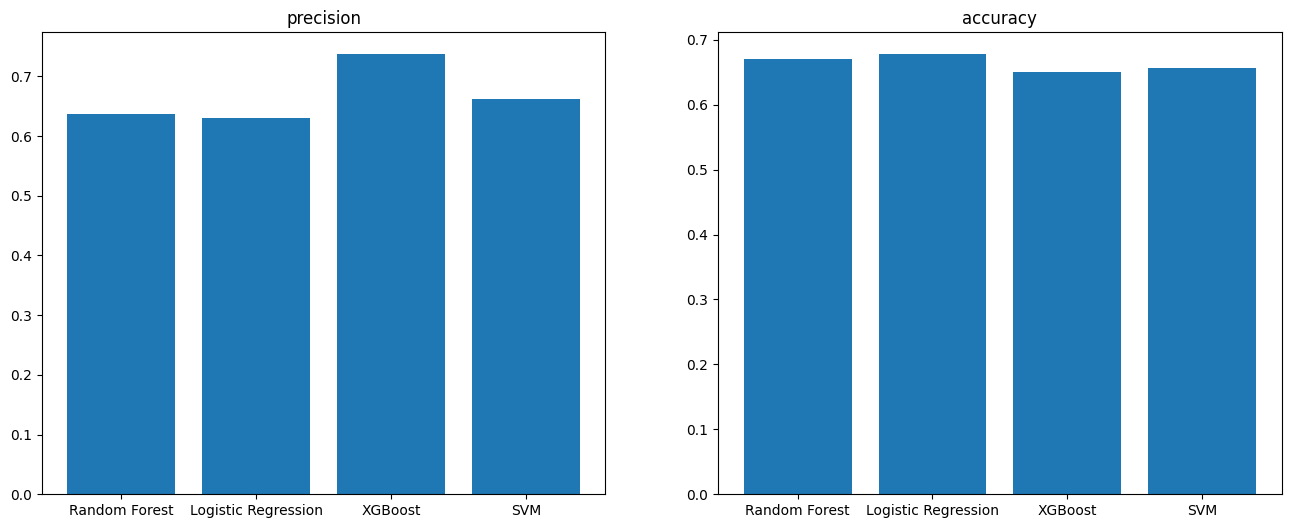

In [184]:
precision_list = [rf_prec, lr_prec, xgb_prec, svm_prec]
model_list = ["Random Forest", "Logistic Regression", "XGBoost", "SVM"]
accuracy_list = [rf_acc, accuracy_score(y_test, lr.predict(x_test)), accuracy_score(y_test, best_xgb.predict(x_test)), accuracy_score(y_test, grid.predict(x_test))]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].bar(model_list, precision_list)
ax[0].set_title("precision")
ax[1].bar(model_list, accuracy_list)
ax[1].set_title("accuracy")
plt.show()

# Evaluation

We'll use the model with highest precision, combine both home and away prediction to see how many games the model predict one team to win, which is our actual precision

In [177]:
combined = pd.DataFrame(dict(actual=y_test, predicted=best_xgb.predict(x_test)), index=y_test.index)
combined

,actual,predicted
165,0,0
166,1,0
167,1,0
168,0,0
169,0,0
...,...,...
4437,0,0
4438,0,0
4439,1,0
4440,0,0


In [178]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)
combined

,actual,predicted,date,team,opponent,result
165,0,0,2023-01-03,Arsenal,Newcastle Utd,D
166,1,0,2023-01-15,Arsenal,Tottenham,W
167,1,0,2023-01-22,Arsenal,Manchester Utd,W
168,0,0,2023-02-04,Arsenal,Everton,L
169,0,0,2023-02-11,Arsenal,Brentford,D
...,...,...,...,...,...,...
4437,0,0,2024-04-20,Wolverhampton Wanderers,Arsenal,L
4438,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L
4439,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W
4440,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L


In [179]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"}
mapping = MissingDict(**map_values)

In [180]:
combined["new_team"] = combined["team"].map(mapping)

In [181]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2023-01-03,Arsenal,Newcastle Utd,D,Arsenal,0,0,Newcastle United,Arsenal,D,Newcastle Utd
1,1,0,2023-01-15,Arsenal,Tottenham,W,Arsenal,0,0,Tottenham Hotspur,Arsenal,L,Tottenham
2,1,0,2023-01-22,Arsenal,Manchester Utd,W,Arsenal,0,0,Manchester United,Arsenal,L,Manchester Utd
3,0,0,2023-02-04,Arsenal,Everton,L,Arsenal,1,0,Everton,Arsenal,W,Everton
4,0,0,2023-02-11,Arsenal,Brentford,D,Arsenal,0,0,Brentford,Arsenal,D,Brentford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0,0,2024-04-20,Wolverhampton Wanderers,Arsenal,L,Wolves,1,0,Arsenal,Wolves,W,Arsenal
1055,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L,Wolves,1,0,Bournemouth,Wolves,W,Bournemouth
1056,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W,Wolves,0,0,Luton Town,Wolves,L,Luton Town
1057,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L,Wolves,1,1,Manchester City,Wolves,W,Manchester City


In [182]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

actual_x
1    68
0    23
Name: count, dtype: int64

In [183]:
68 / (68 + 23)

0.7472527472527473